In [48]:
import uproot
import pandas
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
import keras
import tensorflow as tf
import gc
from sklearn.model_selection import train_test_split

In [2]:
central_tau_id_branches = ['againstElectronMVA6Raw', 'byCombinedIsolationDeltaBetaCorrRaw3Hits',
    'byIsolationMVArun2v1DBoldDMwLTraw', 'byIsolationMVArun2v1DBdR03oldDMwLTraw',
    'byIsolationMVArun2v1DBoldDMwLTraw2016', 'byIsolationMVArun2017v2DBoldDMwLTraw2017',
    'byIsolationMVArun2017v2DBoldDMdR0p3wLTraw2017', 'id_flags']
truth_branches = ['gen_match']
input_branches = ['pt', 'eta', 'mass', 'decayMode', 'chargedIsoPtSum', 'neutralIsoPtSum', 'neutralIsoPtSumWeight',
                  'photonPtSumOutsideSignalCone', 'puCorrPtSum',
                  'dxy', 'dxy_sig', 'dz', 'ip3d', 'ip3d_sig',
                  'hasSecondaryVertex', 'flightLength_r', 'flightLength_dEta', 'flightLength_dPhi',
                  'flightLength_sig', 'leadChargedHadrCand_pt', 'leadChargedHadrCand_dEta',
                  'leadChargedHadrCand_dPhi', 'leadChargedHadrCand_mass', 'pt_weighted_deta_strip',
                  'pt_weighted_dphi_strip', 'pt_weighted_dr_signal', 'pt_weighted_dr_iso',
                  'leadingTrackNormChi2', 'e_ratio', 'gj_angle_diff', 'n_photons', 'emFraction',
                  'has_gsf_track', 'inside_ecal_crack',
                  'gsf_ele_matched', 'gsf_ele_pt', 'gsf_ele_dEta', 'gsf_ele_dPhi', 'gsf_ele_mass', 'gsf_ele_Ee',
                  'gsf_ele_Egamma', 'gsf_ele_Pin', 'gsf_ele_Pout', 'gsf_ele_EtotOverPin', 'gsf_ele_Eecal',
                  'gsf_ele_dEta_SeedClusterTrackAtCalo', 'gsf_ele_dPhi_SeedClusterTrackAtCalo', 'gsf_ele_mvaIn_sigmaEtaEta',
                  'gsf_ele_mvaIn_hadEnergy',
                  'gsf_ele_mvaIn_deltaEta', 'gsf_ele_Chi2NormGSF', 'gsf_ele_GSFNumHits', 'gsf_ele_GSFTrackResol',
                  'gsf_ele_GSFTracklnPt', 'gsf_ele_Chi2NormKF', 'gsf_ele_KFNumHits',
                  'leadChargedCand_etaAtEcalEntrance', 'leadChargedCand_pt', 'leadChargedHadrCand_HoP',
                  'leadChargedHadrCand_EoP', 'tau_visMass_innerSigCone', 'n_matched_muons', 'muon_pt', 'muon_dEta', 'muon_dPhi',
                  'muon_n_matches_DT_1', 'muon_n_matches_DT_2', 'muon_n_matches_DT_3', 'muon_n_matches_DT_4',
                  'muon_n_matches_CSC_1', 'muon_n_matches_CSC_2', 'muon_n_matches_CSC_3', 'muon_n_matches_CSC_4',
                  'muon_n_hits_DT_2', 'muon_n_hits_DT_3', 'muon_n_hits_DT_4',
                  'muon_n_hits_CSC_2', 'muon_n_hits_CSC_3', 'muon_n_hits_CSC_4',
                  'muon_n_hits_RPC_2', 'muon_n_hits_RPC_3', 'muon_n_hits_RPC_4',
                  'muon_n_stations_with_matches_03', 'muon_n_stations_with_hits_23', 
                  'signalChargedHadrCands_sum_innerSigCone_pt', 'signalChargedHadrCands_sum_innerSigCone_dEta',
                  'signalChargedHadrCands_sum_innerSigCone_dPhi', 'signalChargedHadrCands_sum_innerSigCone_mass',
                  'signalChargedHadrCands_sum_outerSigCone_pt', 'signalChargedHadrCands_sum_outerSigCone_dEta',
                  'signalChargedHadrCands_sum_outerSigCone_dPhi', 'signalChargedHadrCands_sum_outerSigCone_mass',
                  'signalChargedHadrCands_nTotal_innerSigCone', 'signalChargedHadrCands_nTotal_outerSigCone',
                  'signalNeutrHadrCands_sum_innerSigCone_pt', 'signalNeutrHadrCands_sum_innerSigCone_dEta',
                  'signalNeutrHadrCands_sum_innerSigCone_dPhi', 'signalNeutrHadrCands_sum_innerSigCone_mass',
                  'signalNeutrHadrCands_sum_outerSigCone_pt', 'signalNeutrHadrCands_sum_outerSigCone_dEta',
                  'signalNeutrHadrCands_sum_outerSigCone_dPhi', 'signalNeutrHadrCands_sum_outerSigCone_mass',
                  'signalNeutrHadrCands_nTotal_innerSigCone', 'signalNeutrHadrCands_nTotal_outerSigCone',
                  'signalGammaCands_sum_innerSigCone_pt', 'signalGammaCands_sum_innerSigCone_dEta',
                  'signalGammaCands_sum_innerSigCone_dPhi', 'signalGammaCands_sum_innerSigCone_mass',
                  'signalGammaCands_sum_outerSigCone_pt', 'signalGammaCands_sum_outerSigCone_dEta',
                  'signalGammaCands_sum_outerSigCone_dPhi', 'signalGammaCands_sum_outerSigCone_mass',
                  'signalGammaCands_nTotal_innerSigCone', 'signalGammaCands_nTotal_outerSigCone',
                  'isolationChargedHadrCands_sum_pt', 'isolationChargedHadrCands_sum_dEta',
                  'isolationChargedHadrCands_sum_dPhi', 'isolationChargedHadrCands_sum_mass',
                  'isolationChargedHadrCands_nTotal',
                  'isolationNeutrHadrCands_sum_pt', 'isolationNeutrHadrCands_sum_dEta',
                  'isolationNeutrHadrCands_sum_dPhi', 'isolationNeutrHadrCands_sum_mass',
                  'isolationNeutrHadrCands_nTotal',
                  'isolationGammaCands_sum_pt', 'isolationGammaCands_sum_dEta',
                  'isolationGammaCands_sum_dPhi', 'isolationGammaCands_sum_mass',
                  'isolationGammaCands_nTotal',
                 ]
all_branches = truth_branches + input_branches + central_tau_id_branches
match_suffixes = [ 'e', 'mu', 'tau', 'jet' ]
gen_match_ex_branches = [ 'gen_match_{}'.format(suff) for suff in match_suffixes ]
e, mu, tau, jet = 0, 1, 2, 3
input_shape = (len(input_branches), )
n_outputs = len(gen_match_ex_branches)

class GenMatch:
    Electron = 1
    Muon = 2
    TauElectron = 3
    TauMuon = 4
    Tau = 5
    NoMatch = 6 

In [3]:
def ReadBranchesFromFile(file_name, tree_name, branches, dtype, chunk_size = 10, nentries=None):
    data = None
    n = 0
    branch_chunks = [ branches[pos:pos+chunk_size] for pos in range(0, len(branches), chunk_size) ]
    if nentries is None:
        with uproot.open(file_name) as file:
            tree = file[tree_name]
            nentries = tree.numentries
        gc.collect()
    data = np.empty([nentries, len(branches)], dtype=dtype)
    for chunk in branch_chunks:
        with uproot.open(file_name) as file:
            tree = file[tree_name]
            arrays = tree.arrays(chunk, entrystop=nentries)
            for br in chunk:
                data[:, n] = arrays[br.encode()].astype(dtype)
                print("branch '{}' loaded. {}/{}".format(br, n + 1, len(branches)))
                n += 1
        gc.collect()
    return data

In [4]:
def VectorizeGenMatch(data, dtype):
    if data.shape[1] != 1:
        raise RuntimeError("Invalid input")
    v_data = np.zeros([data.shape[0], 4], dtype=dtype)
    v_data[:, 0] = ((data[:, 0] == 1) | (data[:, 0] == 3)).astype(dtype)
    v_data[:, 1] = ((data[:, 0] == 2) | (data[:, 0] == 4)).astype(dtype)
    v_data[:, 2] = (data[:, 0] == 5).astype(dtype)
    v_data[:, 3] = (data[:, 0] == 6).astype(dtype)
    return v_data

In [5]:
X_jet = ReadBranchesFromFile('../../tuples/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/testing/taus_jet.root',
                         'taus', input_branches, np.float32, nentries=int(1.5e7))
X_jet.shape

branch 'pt' loaded. 1/129
branch 'eta' loaded. 2/129
branch 'mass' loaded. 3/129
branch 'decayMode' loaded. 4/129
branch 'chargedIsoPtSum' loaded. 5/129
branch 'neutralIsoPtSum' loaded. 6/129
branch 'neutralIsoPtSumWeight' loaded. 7/129
branch 'photonPtSumOutsideSignalCone' loaded. 8/129
branch 'puCorrPtSum' loaded. 9/129
branch 'dxy' loaded. 10/129
branch 'dxy_sig' loaded. 11/129
branch 'dz' loaded. 12/129
branch 'ip3d' loaded. 13/129
branch 'ip3d_sig' loaded. 14/129
branch 'hasSecondaryVertex' loaded. 15/129
branch 'flightLength_r' loaded. 16/129
branch 'flightLength_dEta' loaded. 17/129
branch 'flightLength_dPhi' loaded. 18/129
branch 'flightLength_sig' loaded. 19/129
branch 'leadChargedHadrCand_pt' loaded. 20/129
branch 'leadChargedHadrCand_dEta' loaded. 21/129
branch 'leadChargedHadrCand_dPhi' loaded. 22/129
branch 'leadChargedHadrCand_mass' loaded. 23/129
branch 'pt_weighted_deta_strip' loaded. 24/129
branch 'pt_weighted_dphi_strip' loaded. 25/129
branch 'pt_weighted_dr_signal' l

(15000000, 129)

In [7]:
Y_raw = ReadBranchesFromFile('../../tuples/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/testing/taus_jet.root',
                             'taus', truth_branches, int, nentries=int(1.5e7))
Y_jet = VectorizeGenMatch(Y_raw, int)
Y_jet.shape

branch 'gen_match' loaded. 1/1


(15000000, 4)

In [8]:
pred_jet_pog = ReadBranchesFromFile('../../tuples/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/testing/taus_jet.root',
                             'taus', ['byIsolationMVArun2017v2DBoldDMwLTraw2017'], np.float32, nentries=int(1.5e7)) 

branch 'byIsolationMVArun2017v2DBoldDMwLTraw2017' loaded. 1/1


In [9]:
X_tau_jet = ReadBranchesFromFile('../../tuples/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/testing/taus_tau.root',
                         'taus', input_branches, np.float32)
X_tau_jet.shape

branch 'pt' loaded. 1/129
branch 'eta' loaded. 2/129
branch 'mass' loaded. 3/129
branch 'decayMode' loaded. 4/129
branch 'chargedIsoPtSum' loaded. 5/129
branch 'neutralIsoPtSum' loaded. 6/129
branch 'neutralIsoPtSumWeight' loaded. 7/129
branch 'photonPtSumOutsideSignalCone' loaded. 8/129
branch 'puCorrPtSum' loaded. 9/129
branch 'dxy' loaded. 10/129
branch 'dxy_sig' loaded. 11/129
branch 'dz' loaded. 12/129
branch 'ip3d' loaded. 13/129
branch 'ip3d_sig' loaded. 14/129
branch 'hasSecondaryVertex' loaded. 15/129
branch 'flightLength_r' loaded. 16/129
branch 'flightLength_dEta' loaded. 17/129
branch 'flightLength_dPhi' loaded. 18/129
branch 'flightLength_sig' loaded. 19/129
branch 'leadChargedHadrCand_pt' loaded. 20/129
branch 'leadChargedHadrCand_dEta' loaded. 21/129
branch 'leadChargedHadrCand_dPhi' loaded. 22/129
branch 'leadChargedHadrCand_mass' loaded. 23/129
branch 'pt_weighted_deta_strip' loaded. 24/129
branch 'pt_weighted_dphi_strip' loaded. 25/129
branch 'pt_weighted_dr_signal' l

(5466964, 129)

In [10]:
Y_raw = ReadBranchesFromFile('../../tuples/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/testing/taus_tau.root',
                             'taus', truth_branches, int)
Y_tau_jet = VectorizeGenMatch(Y_raw, int)
Y_tau_jet.shape

branch 'gen_match' loaded. 1/1


(5466964, 4)

In [27]:
Y_tau = Y_tau_jet

In [11]:
pred_tau_jet_pog = ReadBranchesFromFile('../../tuples/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/testing/taus_tau.root',
                                        'taus', ['byIsolationMVArun2017v2DBoldDMwLTraw2017'], np.float32) 

branch 'byIsolationMVArun2017v2DBoldDMwLTraw2017' loaded. 1/1


In [12]:
#model = load_model("10L1024N_0603.hdf5")
model = load_model('10L1024N_0604_v3_s2_acc.hdf5')

In [13]:
pred_jet = model.predict(X_jet, batch_size = 250000, verbose=1)

15000000/15000000 [==============================] - 120s 8us/step


In [14]:
pred_tau_jet = model.predict(X_tau_jet, batch_size = 250000, verbose=1)

5466964/5466964 [==============================] - 43s 8us/step


In [25]:
pred_tau = pred_tau_jet

In [16]:
Y = np.append(Y_tau_jet[:, 2], Y_jet[:, 2])
#pred = np.append(pred_tau[:, 2]/(pred_tau[:, 0] + pred_tau[:, 1] + pred_tau[:, 3]),
#                 pred_jet[:, 2]/(pred_jet[:, 0] + pred_jet[:, 1] + pred_jet[:, 3]))
pred = np.append(pred_tau_jet[:, 2]/(pred_tau_jet[:, 2] + pred_tau_jet[:, 3]),
                 pred_jet[:, 2]/(pred_jet[:, 2] + pred_jet[:, 3]))

#pred = np.append(pred_tau[:, 2], pred_jet[:, 2])
pred_pog = np.append(pred_tau_jet_pog, pred_jet_pog)
print(Y.shape, pred.shape, pred_pog.shape)

(20466964,) (20466964,) (20466964,)


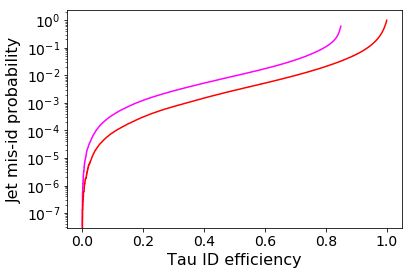

In [17]:
fpr_ref, tpr_ref, thresholds_ref = metrics.roc_curve(Y, pred_pog)
fpr, tpr, thresholds = metrics.roc_curve(Y, pred)
plt.semilogy(tpr_ref[:-1], fpr_ref[:-1], 'magenta', tpr, fpr, 'red')
#plt.ylim([0,0.2])
#plt.xlim([.4, 0.8])
plt.xlabel('Tau ID efficiency', fontsize=16)
plt.ylabel('Jet mis-id probability', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('tau_vs_jet.pdf', bbox_inches='tight')

In [18]:
metrics.roc_auc_score(Y, pred_pog)

0.856661527993014

In [19]:
metrics.roc_auc_score(Y, pred)

0.9731299546939333

In [20]:
X_e = ReadBranchesFromFile('../../tuples/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/testing/taus_e.root',
                           'taus', input_branches, np.float32)
X_e.shape

branch 'pt' loaded. 1/129
branch 'eta' loaded. 2/129
branch 'mass' loaded. 3/129
branch 'decayMode' loaded. 4/129
branch 'chargedIsoPtSum' loaded. 5/129
branch 'neutralIsoPtSum' loaded. 6/129
branch 'neutralIsoPtSumWeight' loaded. 7/129
branch 'photonPtSumOutsideSignalCone' loaded. 8/129
branch 'puCorrPtSum' loaded. 9/129
branch 'dxy' loaded. 10/129
branch 'dxy_sig' loaded. 11/129
branch 'dz' loaded. 12/129
branch 'ip3d' loaded. 13/129
branch 'ip3d_sig' loaded. 14/129
branch 'hasSecondaryVertex' loaded. 15/129
branch 'flightLength_r' loaded. 16/129
branch 'flightLength_dEta' loaded. 17/129
branch 'flightLength_dPhi' loaded. 18/129
branch 'flightLength_sig' loaded. 19/129
branch 'leadChargedHadrCand_pt' loaded. 20/129
branch 'leadChargedHadrCand_dEta' loaded. 21/129
branch 'leadChargedHadrCand_dPhi' loaded. 22/129
branch 'leadChargedHadrCand_mass' loaded. 23/129
branch 'pt_weighted_deta_strip' loaded. 24/129
branch 'pt_weighted_dphi_strip' loaded. 25/129
branch 'pt_weighted_dr_signal' l

(15759701, 129)

In [21]:
Y_raw = ReadBranchesFromFile('../../tuples/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/testing/taus_e.root',
                             'taus', truth_branches, int)
Y_e = VectorizeGenMatch(Y_raw, int)
Y_e.shape

branch 'gen_match' loaded. 1/1


(15759701, 4)

In [22]:
pred_e_pog = ReadBranchesFromFile('../../tuples/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/testing/taus_e.root',
                                  'taus', ['againstElectronMVA6Raw'], np.float32)
pred_e_pog.shape

branch 'againstElectronMVA6Raw' loaded. 1/1


(15759701, 1)

In [23]:
pred_tau_e_pog = ReadBranchesFromFile('../../tuples/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/testing/taus_tau.root',
                                  'taus', ['againstElectronMVA6Raw'], np.float32)
pred_tau_e_pog.shape

branch 'againstElectronMVA6Raw' loaded. 1/1


(5466964, 1)

In [24]:
pred_e = model.predict(X_e, batch_size = 250000, verbose=1)

15759701/15759701 [==============================] - 126s 8us/step


In [28]:
Y = np.append(Y_tau[:, 2], Y_e[:, 2])
pred = np.append(pred_tau[:, 2]/(pred_tau[:, 2] + pred_tau[:, 0]),
                 pred_e[:, 2]/(pred_e[:, 2]+pred_e[:, 0]))
pred_pog = np.append(pred_tau_e_pog, pred_e_pog)
print(Y.shape, pred.shape, pred_pog.shape)

(21226665,) (21226665,) (21226665,)


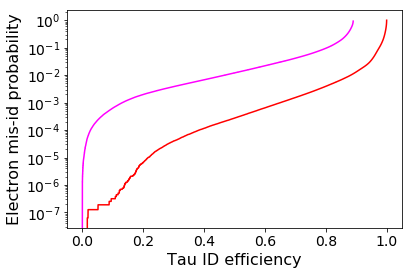

In [29]:
fpr_ref, tpr_ref, thresholds_ref = metrics.roc_curve(Y, pred_pog)
fpr, tpr, thresholds = metrics.roc_curve(Y, pred)
plt.semilogy(tpr_ref[:-1], fpr_ref[:-1], 'magenta', tpr, fpr, 'red')
#plt.ylim([0,0.2])
#plt.xlim([.4, 0.8])
plt.xlabel('Tau ID efficiency', fontsize=16)
plt.ylabel('Electron mis-id probability', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('tau_vs_ele.pdf', bbox_inches='tight')

In [30]:
X_mu = ReadBranchesFromFile('../../tuples/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/testing/taus_mu.root',
                           'taus', input_branches, np.float32)
X_mu.shape

branch 'pt' loaded. 1/129
branch 'eta' loaded. 2/129
branch 'mass' loaded. 3/129
branch 'decayMode' loaded. 4/129
branch 'chargedIsoPtSum' loaded. 5/129
branch 'neutralIsoPtSum' loaded. 6/129
branch 'neutralIsoPtSumWeight' loaded. 7/129
branch 'photonPtSumOutsideSignalCone' loaded. 8/129
branch 'puCorrPtSum' loaded. 9/129
branch 'dxy' loaded. 10/129
branch 'dxy_sig' loaded. 11/129
branch 'dz' loaded. 12/129
branch 'ip3d' loaded. 13/129
branch 'ip3d_sig' loaded. 14/129
branch 'hasSecondaryVertex' loaded. 15/129
branch 'flightLength_r' loaded. 16/129
branch 'flightLength_dEta' loaded. 17/129
branch 'flightLength_dPhi' loaded. 18/129
branch 'flightLength_sig' loaded. 19/129
branch 'leadChargedHadrCand_pt' loaded. 20/129
branch 'leadChargedHadrCand_dEta' loaded. 21/129
branch 'leadChargedHadrCand_dPhi' loaded. 22/129
branch 'leadChargedHadrCand_mass' loaded. 23/129
branch 'pt_weighted_deta_strip' loaded. 24/129
branch 'pt_weighted_dphi_strip' loaded. 25/129
branch 'pt_weighted_dr_signal' l

(16385533, 129)

In [31]:
Y_raw = ReadBranchesFromFile('../../tuples/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/testing/taus_mu.root',
                             'taus', truth_branches, int)
Y_mu = VectorizeGenMatch(Y_raw, int)
Y_mu.shape

branch 'gen_match' loaded. 1/1


(16385533, 4)

In [32]:
def ExtractMuonDiscriminators(id_flags):
    mu_disc = np.zeros([id_flags.shape[0], 2], dtype=int)
    mu_disc[:, 0] = np.bitwise_and(np.right_shift(id_flags[:, 0], 5), 1)
    mu_disc[:, 1] = np.bitwise_and(np.right_shift(id_flags[:, 0], 6), 1)
    return mu_disc

In [33]:
pred_mu_pog_raw = ReadBranchesFromFile('../../tuples/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/testing/taus_mu.root',
                                  'taus', ['id_flags'], np.int64)
pred_mu_pog = ExtractMuonDiscriminators(pred_mu_pog_raw)
pred_mu_pog.shape

branch 'id_flags' loaded. 1/1


(16385533, 2)

In [34]:
pred_tau_mu_pog_raw = ReadBranchesFromFile('../../tuples/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/testing/taus_tau.root',
                                  'taus', ['id_flags'], np.int64)
pred_tau_mu_pog = ExtractMuonDiscriminators(pred_tau_mu_pog_raw)
pred_tau_mu_pog.shape

branch 'id_flags' loaded. 1/1


(5466964, 2)

In [35]:
pred_mu = model.predict(X_mu, batch_size = 250000, verbose=1)

16385533/16385533 [==============================] - 130s 8us/step


In [36]:
Y = np.append(Y_tau[:, 2], Y_mu[:, 2])
pred = np.append(pred_tau[:, 2]/(pred_tau[:, 2] + pred_tau[:, 1]),
                 pred_mu[:, 2]/(pred_mu[:, 2] + pred_mu[:, 1]))
pred_pog_loose = np.append(pred_tau_mu_pog[:, 0], pred_mu_pog[:, 0])
pred_pog_tight = np.append(pred_tau_mu_pog[:, 1], pred_mu_pog[:, 1])
print(Y.shape, pred.shape, pred_pog_loose.shape, pred_pog_tight.shape)

(21852497,) (21852497,) (21852497,) (21852497,)


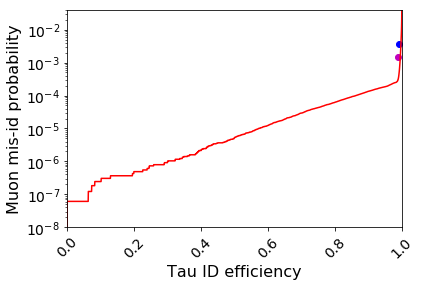

In [44]:
fpr_ref, tpr_ref, thresholds_ref = metrics.roc_curve(Y, pred_pog_loose)
fpr_ref_2, tpr_ref_2, thresholds_ref_2 = metrics.roc_curve(Y, pred_pog_tight)
fpr, tpr, thresholds = metrics.roc_curve(Y, pred)
plt.semilogy(tpr_ref[1:2], fpr_ref[1:2], 'bo', tpr_ref_2[1:2], fpr_ref_2[1:2], 'mo', tpr, fpr, 'red')
plt.ylim([1e-8, 0.04])
plt.xlim([.0, 1])
plt.xlabel('Tau ID efficiency', fontsize=16)
plt.ylabel('Muon mis-id probability', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.savefig('tau_vs_mu.pdf', bbox_inches='tight')

In [47]:
keras.backend.get_session()

In [49]:
def load_graph(graph_filename):
    with tf.gfile.GFile(graph_filename, 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
    
    with tf.Graph().as_default() as graph:
        tf.import_graph_def(graph_def, name="deepTau")
    return graph

In [50]:
graph = load_graph('10L1024N_0604_v3_s2_acc_full.pb')

In [51]:
for op in graph.get_operations():
    print(op.name)

deepTau/dense_94_input
deepTau/dense_94/kernel
deepTau/dense_94/kernel/read
deepTau/dense_94/bias
deepTau/dense_94/bias/read
deepTau/dense_94/MatMul
deepTau/dense_94/BiasAdd
deepTau/batch_normalization_60/gamma
deepTau/batch_normalization_60/gamma/read
deepTau/batch_normalization_60/beta
deepTau/batch_normalization_60/beta/read
deepTau/batch_normalization_60/moving_mean
deepTau/batch_normalization_60/moving_mean/read
deepTau/batch_normalization_60/moving_variance
deepTau/batch_normalization_60/moving_variance/read
deepTau/batch_normalization_60/batchnorm_1/add/y
deepTau/batch_normalization_60/batchnorm_1/add
deepTau/batch_normalization_60/batchnorm_1/Rsqrt
deepTau/batch_normalization_60/batchnorm_1/mul
deepTau/batch_normalization_60/batchnorm_1/mul_1
deepTau/batch_normalization_60/batchnorm_1/mul_2
deepTau/batch_normalization_60/batchnorm_1/sub
deepTau/batch_normalization_60/batchnorm_1/add_1
deepTau/activation_94/Relu
deepTau/dropout_87/Identity
deepTau/dense_95/kernel
deepTau/dense_9

In [56]:
x_gr = graph.get_tensor_by_name('deepTau/dense_94_input:0')
y_gr = graph.get_tensor_by_name('deepTau/output_node0:0')

In [59]:
sess = tf.Session(graph=graph)

In [73]:
N=10000
diff = np.zeros([N, 4])
for n in range(N):
    y_out = sess.run(y_gr, feed_dict={x_gr: X_tau_jet[n:n+1, :] })
    diff[n, :] = (pred_tau[n, :] - y_out) / pred_tau[n, :]

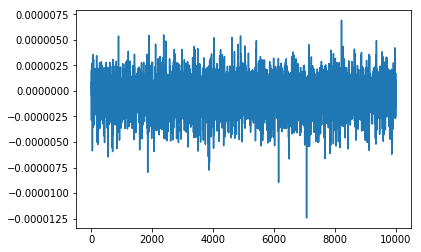

In [77]:
plt.plot(diff[:, 3])

In [66]:
y_out

array([[1.3476193e-02, 1.4143132e-04, 9.7120380e-01, 1.5178562e-02]],
      dtype=float32)

In [64]:
pred_tau[234, :]

array([1.3476225e-02, 1.4143159e-04, 9.7120380e-01, 1.5178562e-02],
      dtype=float32)